In [1]:
import sys
import shap
import torch
from SHAP.shap import approximate_shap_values, visualize_shap_values, get_visualization_config, text_plot_shap
%load_ext autoreload
%autoreload 2
from dataset_parser.davidson_parser import DavidsonDataset
from joint_model import JointModel
from util.WeightedRandomSampler import WeightedRandomSampler
import transformers

In [2]:
devset = DavidsonDataset(fixed_set="val")
BATCH_SIZE = 256
sampler_devset = WeightedRandomSampler(devset, 1000)
devloader = torch.utils.data.DataLoader(devset, batch_size=1,
                                        num_workers=6)

Loading Davidson val set from fixed split.
Successfully loaded davidson dataset.


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
joint_model = JointModel()
joint_model.to(device)
if "cuda" in str(device):
    joint_model.load_state_dict(torch.load('../../models/joint_model_davidson_nulled_network_10epochs.model'))
else:
    print("check-else")
    joint_model.load_state_dict(torch.load('../../models/joint_model_davidson_nulled_network_10epochs.model', map_location=torch.device('cpu')))


Successfully initialized TweetNetwork submodel
Successfully initialized TweetClassifier submodel
hate done
offensive done
neither done
Successfully initialized TweetHistory submodel
Successfully initialized last final classification layer


In [128]:
for i, data in enumerate(devset.get_tweets_for_user_id(user_id=79140662)):
    #if i < 1:
    #    continue
    input_ids, attention_mask, user_id, tweet_label = data['input_ids'], data['attention_mask'], data['userid'], data['label']
    input_ids, attention_mask, tweet_label = input_ids.to(device),  attention_mask.to(device), tweet_label.to(device)
    shap_values, predicted_class, feature_distribution, vocab_indices = approximate_shap_values(joint_model,input_ids, attention_mask, user_id, False, True)
    if i == 0:
        break

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Original tweet: @ blackchiquitita : wow . rt @ thatmanpalmer i ' m lost . are those buttcheek piercings ? https : / / twitter . com / thatmanpalmer / status / 429868547377221632 / photo / 1pic . twitter . com / yn6guyouq6 yeah she ' s a hoe
Features contributions to class 1 (real class: 1)


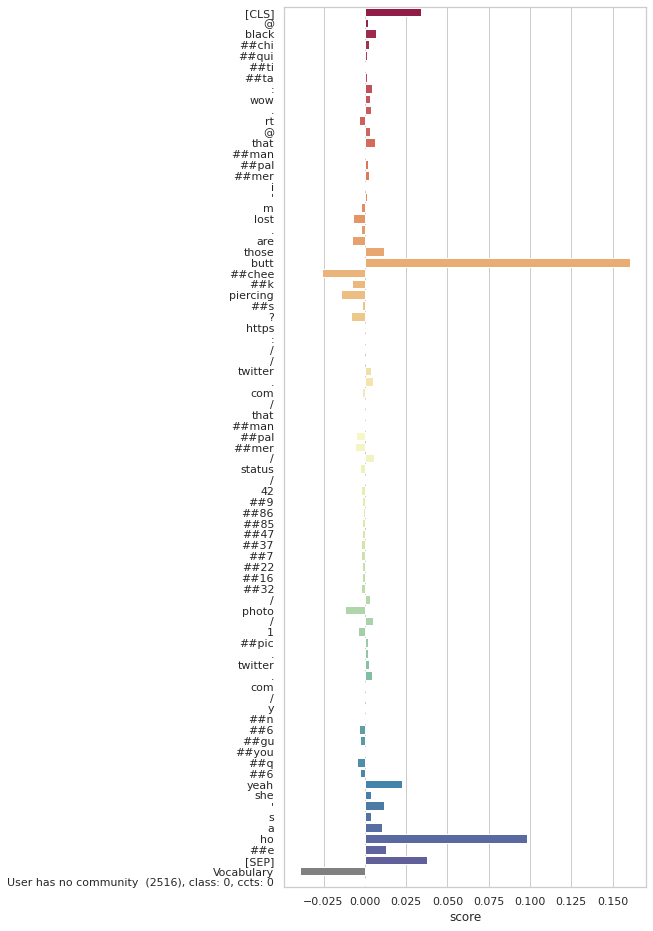

In [129]:
true_class = tweet_label.item()
tweet_as_string, features, palette = get_visualization_config(joint_model, input_ids, user_id, vocab_indices, feature_distribution,
                             split_up_vocab=False, network_as_one=True)
visualize_shap_values(shap_values, predicted_class, true_class, joint_model, input_ids, vocab_indices, user_id, feature_distribution, False, True)

# interesting UID 1678982670
# check user network for 1639520383

In [131]:
text_plot_shap(shap_values=shap_values,tweet_as_string=tweet_as_string, untokenize = True)
text_plot_shap(shap_values=shap_values,tweet_as_string=tweet_as_string, untokenize = False)

In [13]:
user_set =  set(devset.users)
seen_set = set()
duplicate_set = set(x for x in devset.users if x in seen_set or seen_set.add(x))
duplicate_set


{9824952,
 16182819,
 18014373,
 18397572,
 18892043,
 19912367,
 19924290,
 20091551,
 20467320,
 20554268,
 22293675,
 25641346,
 25647572,
 26101406,
 26160792,
 28369739,
 28662426,
 28873796,
 33525720,
 33958070,
 36061182,
 39564164,
 41922048,
 46573909,
 47705062,
 50777852,
 51570443,
 61153399,
 62415335,
 65398655,
 70793808,
 77623197,
 78222718,
 78329845,
 79140662,
 79570681,
 82977912,
 88045083,
 90573210,
 96103337,
 97118320,
 110904998,
 120562342,
 138210623,
 141682204,
 152891078,
 164134849,
 164600724,
 168935751,
 171793023,
 173119990,
 183157238,
 193995383,
 194006029,
 203816023,
 217566896,
 223261264,
 235782972,
 236314531,
 237422935,
 238063487,
 246576627,
 247616852,
 260527870,
 266932764,
 273723066,
 280674564,
 291996706,
 292734213,
 298872578,
 300038560,
 303202309,
 311096280,
 314759362,
 316041133,
 337361002,
 340478686,
 342324145,
 348176860,
 355233473,
 362351769,
 364964232,
 383426973,
 392513009,
 422890758,
 427168299,
 444137201